### add relevant annotations to the list of genes

there is a list of all the genes I use here: data/references/gencode.v26.GRCh38.genes.gtf

I should add to that different annotations, that will make cluster annotaiton much easier/more computaitonally efficient

* cross-mappable genes
* go terms
* paralogs
* enhancers that contact (in each relevant cell type)
* bidirectional promoter genes
* expression level 




In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [49]:
prefix = '/home/klawren/oak/pcqtls'

load in unannotated genes

In [50]:
# load in the gene information (for gene-gene distances)
full_gencode=pd.read_csv(f'{prefix}/data/references/gencode.v26.GRCh38.genes.gtf', sep='\t', skiprows=range(6), 
            header=None, names=['chr', 'dataset', 'type', 'start','end', '.', 'strand', 'na', 'info'])

full_gencode = full_gencode[full_gencode['type']=='transcript']
full_gencode['transcript_id'] = full_gencode['info'].str.split(';').str[1].str.split('\"').str[-2]
full_gencode['gene_name'] = full_gencode['info'].str.split(';').str[3].str.split('\"').str[-2]

full_gencode['gene_type'] = full_gencode['info'].str.split(';').str[2].str.split('\"').str[-2]
full_gencode['tss_start'] = np.where(full_gencode['strand'] == '+', full_gencode['start'], full_gencode['end'])

In [51]:
gencode = full_gencode.drop(columns=['info', 'dataset', '.', 'type'])

add cross_mappibility info, downloaded from https://figshare.com/ndownloader/files/13514741

In [52]:
cross_mappability = pd.read_csv(f'{prefix}/data/references/hg38_cross_mappability_strength_symmetric_mean_sorted.txt.gz', sep='\t', header=None, names=['gene_1', 'gene_2', 'cross_mappability'])
cross_mappability

,gene_1,gene_2,cross_mappability
0,ENSG00000000003.14,ENSG00000000457.13,5.0
1,ENSG00000000003.14,ENSG00000001084.10,1.5
2,ENSG00000000003.14,ENSG00000001460.17,11.5
3,ENSG00000000003.14,ENSG00000001461.16,1.0
4,ENSG00000000003.14,ENSG00000001630.15,6.0
...,...,...,...
28343097,ENSG00000284523.1,ENSG00000284526.1,2.0
28343098,ENSG00000284523.1,ENSG00000284554.1,11.0
28343099,ENSG00000284526.1,ENSG00000284543.1,1.5
28343100,ENSG00000284526.1,ENSG00000284554.1,9.0


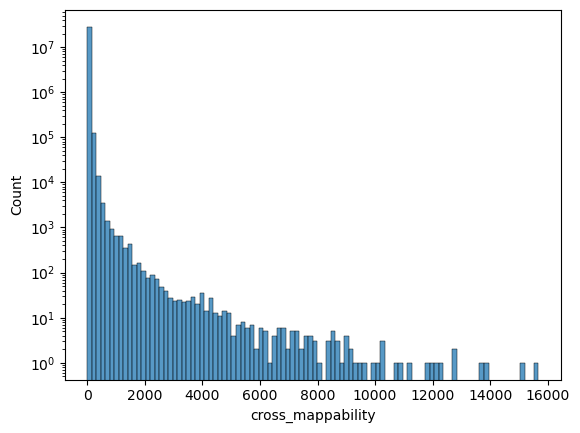

In [53]:
ax = sns.histplot(cross_mappability, x='cross_mappability', bins=100)
ax.set_yscale('log')

In [54]:
cross_mappability[cross_mappability['gene_1'] == 'ENSG00000000457.13']

,gene_1,gene_2,cross_mappability
6870,ENSG00000000457.13,ENSG00000000460.16,55.0
6871,ENSG00000000457.13,ENSG00000001084.10,4.0
6872,ENSG00000000457.13,ENSG00000001460.17,9.5
6873,ENSG00000000457.13,ENSG00000001461.16,10.0
6874,ENSG00000000457.13,ENSG00000001630.15,66.0
...,...,...,...
15581,ENSG00000000457.13,ENSG00000284512.1,17.0
15582,ENSG00000000457.13,ENSG00000284523.1,7.0
15583,ENSG00000000457.13,ENSG00000284526.1,5.0
15584,ENSG00000000457.13,ENSG00000284543.1,14.5


Text(0.5, 0, 'number cross mappable genes per gene')

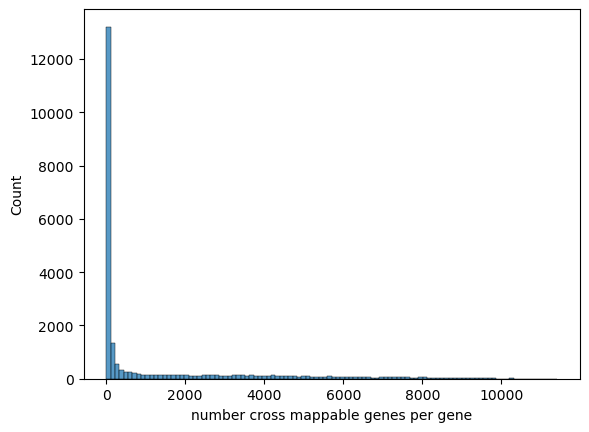

In [55]:
sns.histplot(cross_mappability.groupby('gene_1').agg({'gene_2':'nunique'}), x='gene_2')
plt.xlabel('number cross mappable genes per gene')

In [56]:
# this is too many to add to the gene annotations. I will jsut write out with the info I have and do this at the cluster level

gencode.to_csv(f'{prefix}/data/references/processed_gencode.v26.GRCh38.genes.csv', index=None)